<a href="https://colab.research.google.com/github/GarvChaudhaAI/Fraud-Detection-System/blob/main/frauddetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets
!pip install kaggle
!pip install xgboost
!pip install lightgbm

In [1]:
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf

Please upload kaggle.json file in directory "/content/" before runnning the following command.

In [3]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud")

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


100%|██████████| 66.0M/66.0M [00:00<00:00, 230MB/s]


In [2]:
data = pd.read_csv("//content//creditcardfraud//creditcard.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Data Preprocessing
Since all columns have no missing data there is no need for handling missing values

In [3]:
scaler  = StandardScaler()
data['normAmount'] = scaler.fit_transform(np.array(data['Amount']).reshape(-1, 1))

# drop Time and Amount columns as they are not relevant for prediction purpose
data = data.drop(['Time', 'Amount'], axis = 1)
data['Class'].value_counts()

,count
Class,
0,284315
1,492


In [4]:
X,Y = np.array(data.drop('Class',axis=1)),np.array(data['Class']) #features and labels
print(X.shape)
print(Y.shape)

(284807, 29)
(284807,)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", Y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", Y_test.shape)

Number transactions X_train dataset:  (227845, 29)
Number transactions y_train dataset:  (227845,)
Number transactions X_test dataset:  (56962, 29)
Number transactions y_test dataset:  (56962,)


# Applying SMOTE for addressing class imbalance

In [6]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(Y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(Y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(Y_train_res == 0)))
#Now features with labels 0 and 1 are in equal amount

After OverSampling, the shape of train_X: (454908, 29)
After OverSampling, the shape of train_y: (454908,) 

After OverSampling, counts of label '1': 227454
After OverSampling, counts of label '0': 227454


# Logistic regression

In [7]:
lr = LogisticRegression()
lr.fit(X_train_res,Y_train_res.ravel()) #training Logistic regression model

LogisticRegression()

In [8]:
pred = lr.predict(X_test)
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56861
           1       0.06      0.94      0.12       101

    accuracy                           0.97     56962
   macro avg       0.53      0.96      0.55     56962
weighted avg       1.00      0.97      0.99     56962



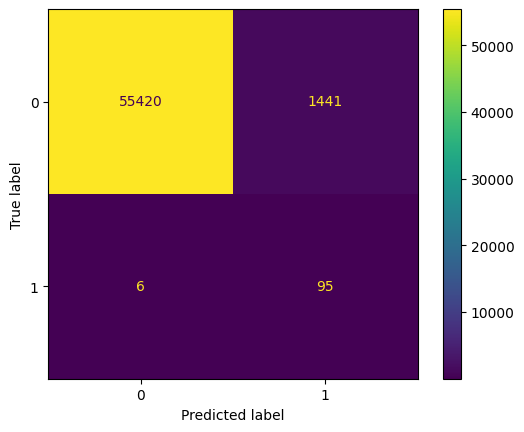

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_test,pred)).plot()

Since percentages are a better representation of how well the model performs for each class, a custom function is written for displaying the heatmap corresponding to percentages.

In [10]:
def CMDisplayPercentage(conf_mat):
  classnames = [0,1]
  conf_mat = np.mat(conf_mat)
  conf_mat = conf_mat.astype(float)/np.sum(conf_mat,axis=1)
  df_cm = pd.DataFrame(np.mat(conf_mat), index=classnames, columns=classnames)
  heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")

  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

  plt.ylabel('True label')

  plt.xlabel('Predicted label')

  plt.show()

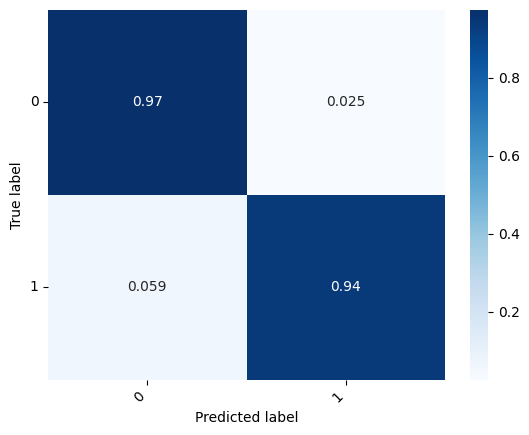

In [11]:
CMDisplayPercentage(confusion_matrix(Y_test,pred))

# Random Forests

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
rf = RandomForestClassifier()
rf.fit(X_train_res,Y_train_res.ravel())

RandomForestClassifier()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.88      0.85      0.86       101

    accuracy                           1.00     56962
   macro avg       0.94      0.93      0.93     56962
weighted avg       1.00      1.00      1.00     56962



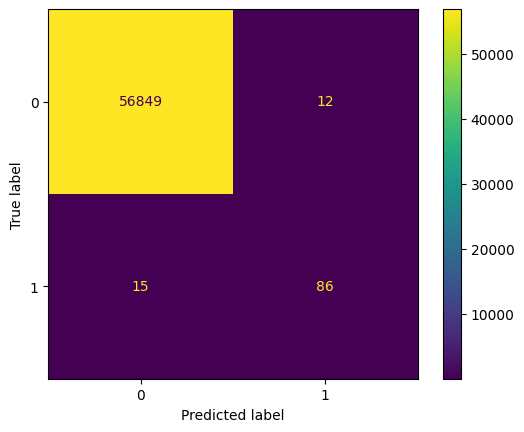

In [14]:
pred_rf = rf.predict(X_test)
print(classification_report(Y_test,pred_rf))
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_test,pred_rf)).plot()

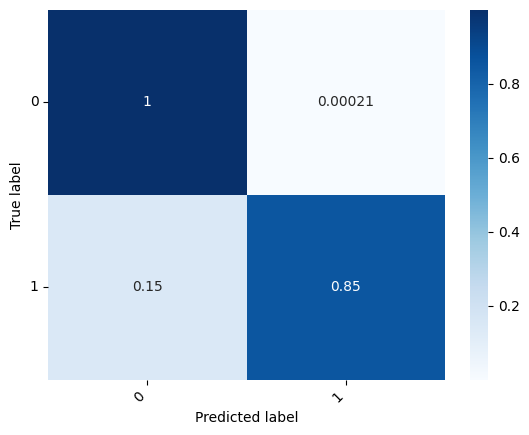

In [15]:
CMDisplayPercentage(confusion_matrix(Y_test,pred_rf))

# Neural Networks
A Neural network with one hidden layer trained with binary loss and adam optimizer.

In [16]:
from tensorflow import keras
from tensorflow.keras import layers

In [17]:
model = keras.models.Sequential()
model.add(layers.Dense(32,input_shape=(29,),activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.fit(X_train,Y_train,epochs=20,batch_size=512)

Epoch 1/20
446/446 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9481 - loss: 0.1792
Epoch 2/20
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9992 - loss: 0.0050
Epoch 3/20
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9994 - loss: 0.0035
Epoch 4/20
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9993 - loss: 0.0038
Epoch 5/20
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9994 - loss: 0.0032
Epoch 6/20
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9993 - loss: 0.0030
Epoch 7/20
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9995 - loss: 0.0022
Epoch 8/20
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9995 - loss: 0.0025
Epoch 9/20
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9994 - loss: 0.0024
Epoch 10/20
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9995 - loss: 0.0022
Epoch 11/20
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9995 - loss: 0.0024
Epoch 12/20
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.91      0.81      0.86       101

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



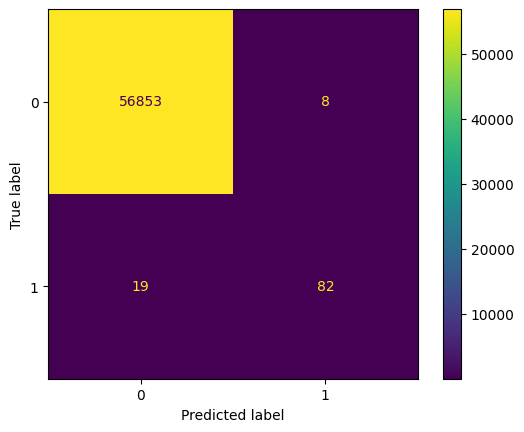

In [19]:
pred_neural_net = (model.predict(X_test)>0.5).astype(int)
print(classification_report(Y_test,pred_neural_net))
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_test,pred_neural_net)).plot()

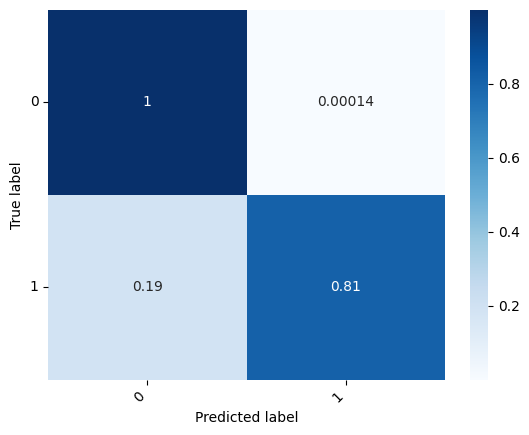

In [20]:
CMDisplayPercentage(confusion_matrix(Y_test,pred_neural_net))

# Support Vectior machines
We are training SVMs with two different kernels see with one performs better with the given dataset.


Since the algorithm behind SVM has *O*(n^3) complexity ,for our dataset with 227845 training examples this leads to a huge number of operations because of which the SVM take too long to train.Hence their output is not shown.



In [ ]:
from sklearn.svm import SVC
svm_1 = SVC(kernel = "linear",C = 1E10)
svm_1.fit(X_train,Y_train)

In [ ]:
pred_svm_1 = svm_1.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_test,pred_svm_1)).plot()

In [ ]:
svm_2 = SVC(kernel = 'rbf',C = 1E10)
svm_2.fit(X_train,Y_train)

In [ ]:
pred_svm_2 = svm_2.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_test,pred_svm_2)).plot()

# XGBoost

In [22]:
import xgboost as xgb
dtrain_reg = xgb.DMatrix(X_train, Y_train)
dtest_reg = xgb.DMatrix(X_test, Y_test)
params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}

In [23]:
n = 100
xgb_model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:13:56] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.93      0.77      0.84       101

    accuracy                           1.00     56962
   macro avg       0.96      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



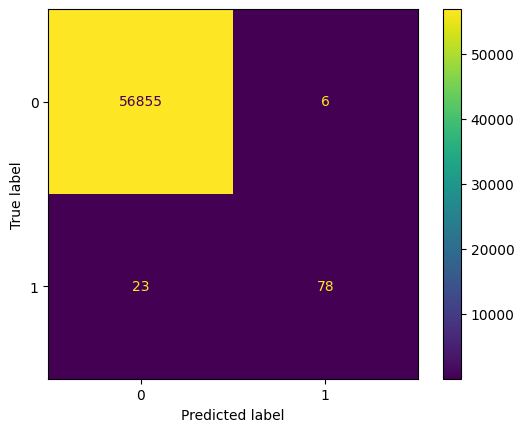

In [28]:
pred_xgb = (xgb_model.predict(dtest_reg)>0.5).astype(int)
print(classification_report(Y_test,pred_xgb))
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_test,pred_xgb)).plot()

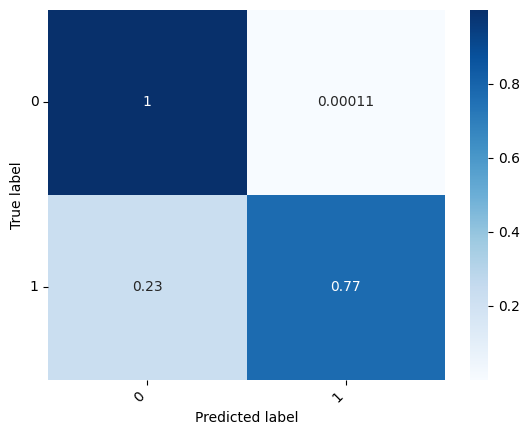

In [29]:
CMDisplayPercentage(confusion_matrix(Y_test,pred_xgb))

# LightGBM

In [30]:
import lightgbm as lgb
# Create a LightGBM dataset
param = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}
train_data = lgb.Dataset(X_train, label=Y_train)

# Train the classifier
classifier = lgb.train(param, train_data, num_boost_round=100)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 391, number of negative: 227454
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.062188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001716 -> initscore=-6.365996
[LightGBM] [Info] Start training from score -6.365996


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.56      0.63      0.60       101

    accuracy                           1.00     56962
   macro avg       0.78      0.82      0.80     56962
weighted avg       1.00      1.00      1.00     56962



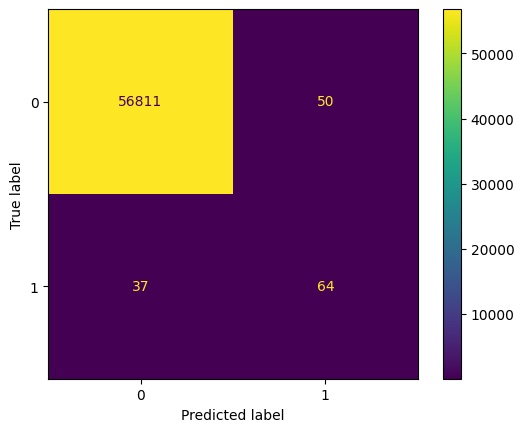

In [32]:
pred_lgb = (classifier.predict(X_test)>0.5).astype(int)
print(classification_report(Y_test,pred_lgb))
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_test,pred_lgb)).plot()

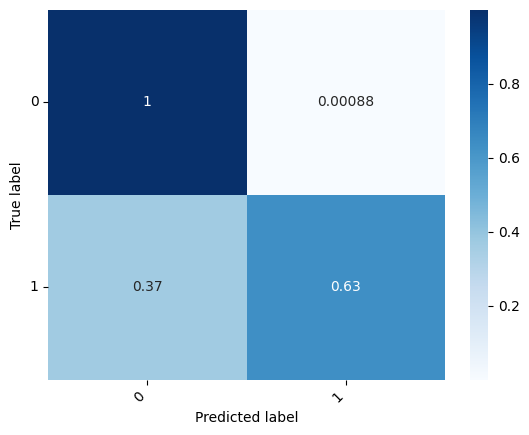

In [33]:
CMDisplayPercentage(confusion_matrix(Y_test,pred_lgb))

# Model evaluation

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import average_precision_score

In [40]:
def show_report(y_test,y_pred_proba,l):
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
  sns.set()
  plt.plot(fpr, tpr)
  plt.plot(fpr, fpr, linestyle = '--', color = 'k')
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  AUROC = np.round(roc_auc_score(y_test, y_pred_proba), 2)
  plt.title(f'Model ROC curve; AUROC: {AUROC}');
  plt.show()


  average_precision = average_precision_score(y_test, y_pred_proba)
  precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
  plt.plot(recall, precision, marker='.', label=l)
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.legend()
  plt.title(f'Precision Recall Curve. AUPRC: {average_precision}')
  plt.show()

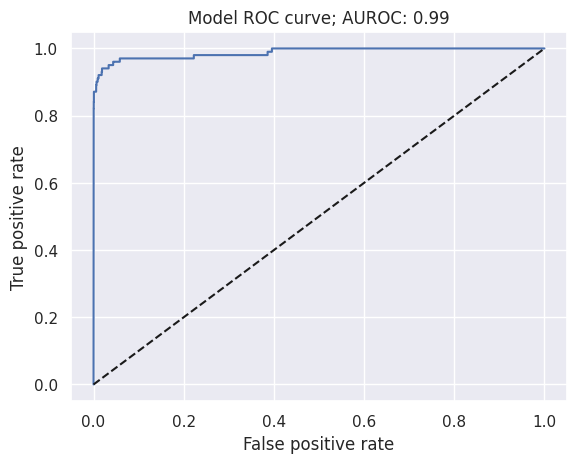

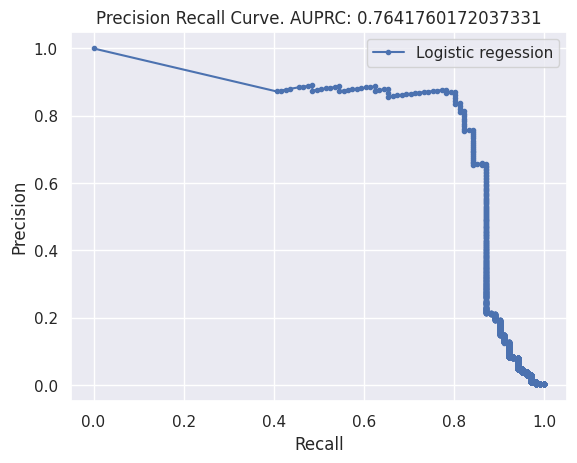

In [41]:
y_prob_lr = lr.predict_proba(X_test)[:,1]
show_report(Y_test,y_prob_lr,'Logistic regession')

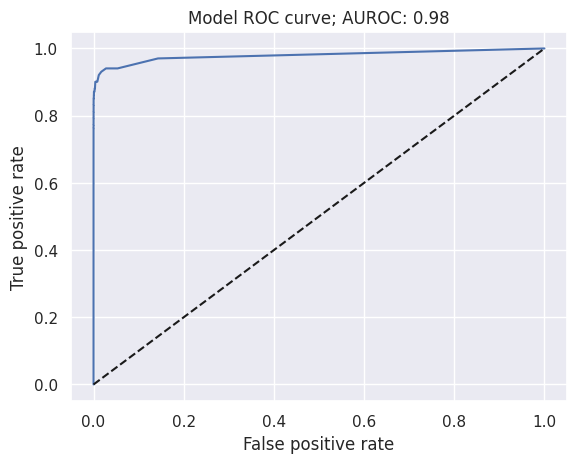

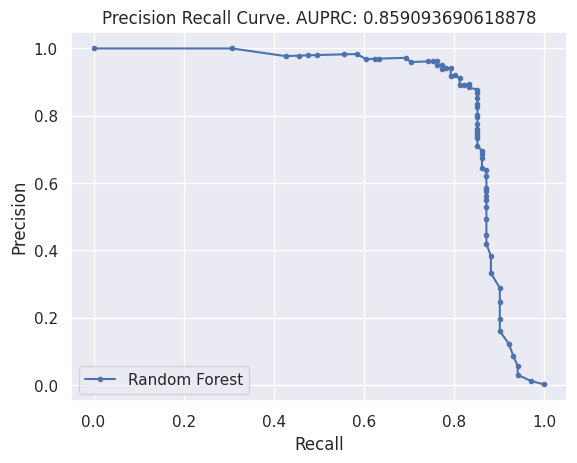

In [43]:
y_prob_rf = rf.predict_proba(X_test)[:,1]
show_report(Y_test,y_prob_rf,'Random Forest')

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step


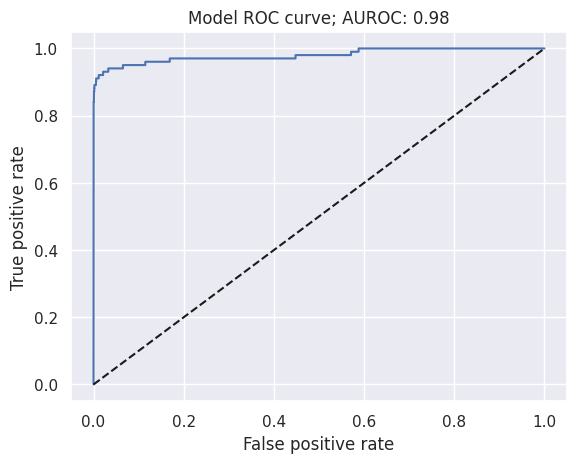

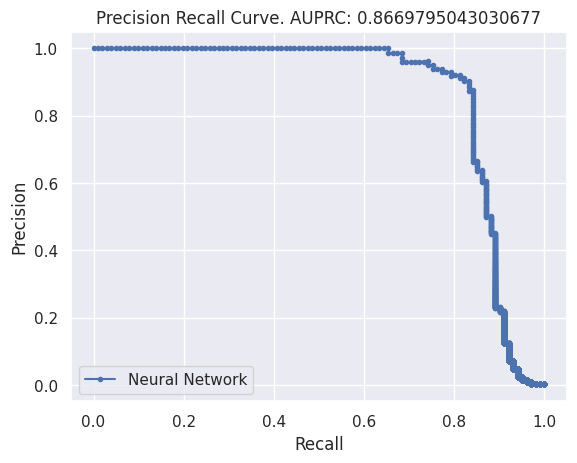

In [46]:
y_prob_neural = model.predict(X_test)
show_report(Y_test,y_prob_neural,'Neural Network')

In [ ]:
y_prob_svm1 = svm_1.predict_proba(X_test)[:,1]
show_report(Y_test,y_prob_svm1,'SVM linear')

In [ ]:
y_prob_svm2 = svm_2.predict_proba(X_test)[:,1]
show_report(Y_test,y_prob_svm2,'SVM rdf')

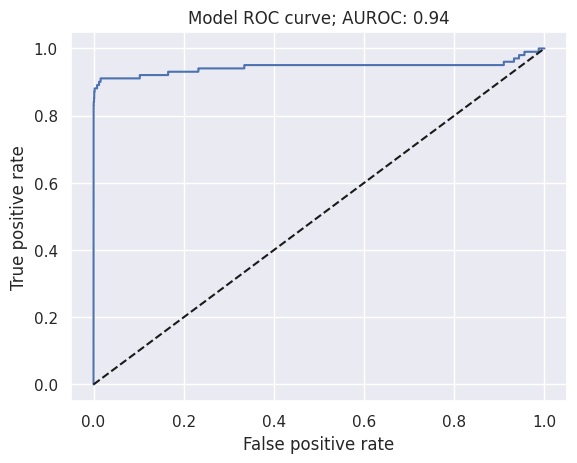

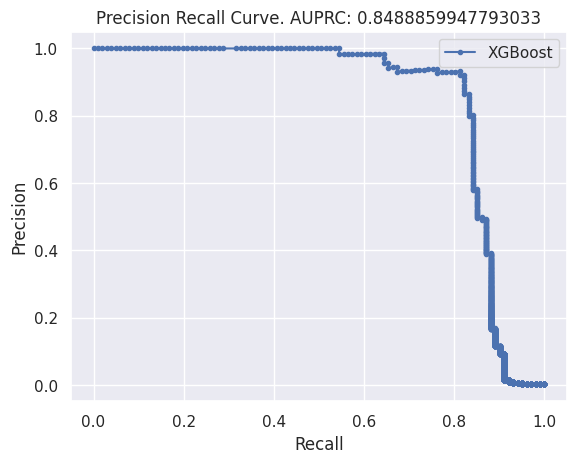

In [49]:
y_prob_xgb = xgb_model.predict(dtest_reg)
show_report(Y_test,y_prob_xgb,'XGBoost')

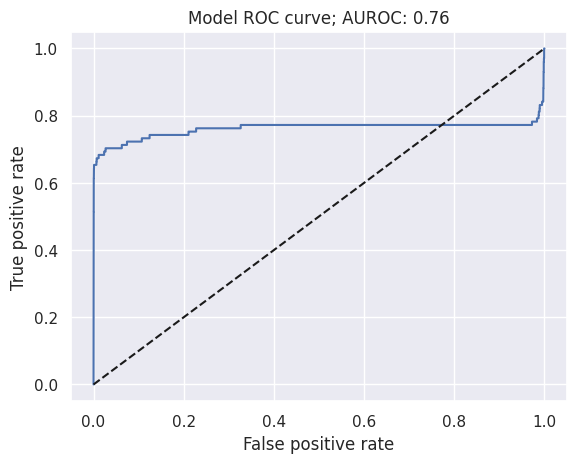

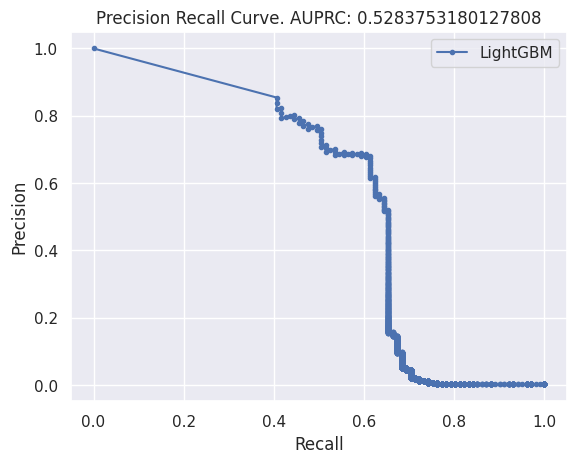

In [48]:
y_prob_lgb = classifier.predict(X_test)
show_report(Y_test,y_prob_lgb,'LightGBM')